## Quickdraw con EMNIST features

En esta notebook tomé 5 clases de la base de datos de quickdraw: apple, smiley face, rabbit, bed, sun y pencil. Después dividí la red en dos partes, la parte de feature layers y la parte de clasification. Copié los pesos de la red entrenada con la base de datos de EMNIST, dicha red tenia la misma arquitectura. Posteriormente reentrené la red para obtener los pesos de las últimas capas (las de clasificación), y obtuve una predicción del 97.38%, lo cual es satisfactorio.

In [15]:
from keras.models import *
from keras.callbacks import *
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import keras
import numpy as np
from keras.models import load_model
#import cv2
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plt
from matplotlib.pyplot import*
from module import printim

In [2]:
apple=np.load('apple.npy')
smiley_face=np.load('smiley_face.npy')
rabbit=np.load('rabbit.npy')
pencil=np.load('pencil.npy')
bed=np.load('bed.npy')
num_classes=5

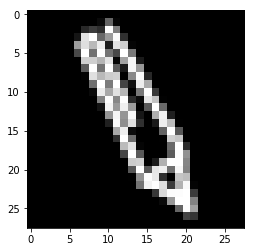

In [55]:
#print(apple[0].reshape(28,28))
plt.imshow(pencil[0].reshape(28,28),cmap='gray')
plt.show()
imsave('pencil.png',pencil[0].reshape(28,28),cmap='gray')

In [45]:
model_EMNIST=load_model('modelo_EMNIST_ok.h5')
num_classes=5

In [46]:
m_model=Sequential()
feature_layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = (28,28,1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
]
for l in feature_layers:
    l.trainable = False
m_model=Sequential(feature_layers+classification_layers)
m_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [47]:
weights= [layer.get_weights() for layer in model_EMNIST.layers]
for i in np.arange(0,len(feature_layers),1):
        m_model.layers[i].set_weights(weights[i])
m_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])


In [49]:
muestras=20000
x_train=np.vstack([apple[0:muestras,:],pencil[0:muestras,:],rabbit[0:muestras,:],smiley_face[0:muestras,:],bed[0:muestras,:]])
#print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')/255
y_train=np.array([np.zeros(muestras),np.ones(muestras),np.ones(muestras)*2,np.ones(muestras)*3,np.ones(muestras)*4])
y_train=y_train.reshape(muestras*5)
y_train = keras.utils.to_categorical(y_train, num_classes)
x_test=np.vstack([apple[muestras:int(muestras+muestras*0.3),:],pencil[muestras:int(muestras+muestras*0.3),:],rabbit[muestras:int(muestras+muestras*0.3),:],smiley_face[muestras:int(muestras+muestras*0.3),:],bed[muestras:int(muestras+muestras*0.3),:]])
#print(x_train.shape)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/255
y_test=np.array([np.zeros(int(muestras*0.3)),np.ones(int(muestras*0.3)),np.ones(int(muestras*0.3))*2,np.ones(int(muestras*0.3))*3,np.ones(int(muestras*0.3))*4])
y_test=y_test.reshape(int(muestras*0.3)*5)
y_test = keras.utils.to_categorical(y_test, num_classes)
hist=m_model.fit(x_train, y_train, batch_size=128*4, epochs=25, verbose=1,validation_data=(x_test,y_test))

Train on 100000 samples, validate on 30000 samples
Epoch 1/25
100000/100000 [==============================] - 128s 1ms/step - loss: 0.2076 - acc: 0.9351 - val_loss: 0.1327 - val_acc: 0.9584
Epoch 2/25
100000/100000 [==============================] - 131s 1ms/step - loss: 0.1448 - acc: 0.9555 - val_loss: 0.1133 - val_acc: 0.9657
Epoch 3/25
100000/100000 [==============================] - 140s 1ms/step - loss: 0.1232 - acc: 0.9619 - val_loss: 0.1024 - val_acc: 0.9685
Epoch 4/25
100000/100000 [==============================] - 132s 1ms/step - loss: 0.1095 - acc: 0.9659 - val_loss: 0.1004 - val_acc: 0.9694
Epoch 5/25
100000/100000 [==============================] - 132s 1ms/step - loss: 0.1009 - acc: 0.9684 - val_loss: 0.1003 - val_acc: 0.9702
Epoch 6/25
100000/100000 [==============================] - 131s 1ms/step - loss: 0.0935 - acc: 0.9699 - val_loss: 0.0947 - val_acc: 0.9715
Epoch 7/25
100000/100000 [==============================] - 136s 1ms/step - loss: 0.0880 - acc: 0.9717 - val_

In [50]:
import json
with open('Quickdraw_with_EMNIST.json', 'w') as f:
    json.dump(hist.history, f)

In [52]:
model_EMNIST=load_model('modelo_EMNIST_ok.h5')
num_classes=5
m_model=Sequential()
feature_layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = (28,28,1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
]
for l in feature_layers:
    l.trainable = True
m_model=Sequential(feature_layers+classification_layers)
m_model.summary()
muestras=20000
x_train=np.vstack([apple[0:muestras,:],pencil[0:muestras,:],rabbit[0:muestras,:],smiley_face[0:muestras,:],bed[0:muestras,:]])
#print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')/255
y_train=np.array([np.zeros(muestras),np.ones(muestras),np.ones(muestras)*2,np.ones(muestras)*3,np.ones(muestras)*4])
y_train=y_train.reshape(muestras*5)
y_train = keras.utils.to_categorical(y_train, num_classes)
x_test=np.vstack([apple[muestras:int(muestras+muestras*0.3),:],pencil[muestras:int(muestras+muestras*0.3),:],rabbit[muestras:int(muestras+muestras*0.3),:],smiley_face[muestras:int(muestras+muestras*0.3),:],bed[muestras:int(muestras+muestras*0.3),:]])
#print(x_train.shape)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/255
y_test=np.array([np.zeros(int(muestras*0.3)),np.ones(int(muestras*0.3)),np.ones(int(muestras*0.3))*2,np.ones(int(muestras*0.3))*3,np.ones(int(muestras*0.3))*4])
y_test=y_test.reshape(int(muestras*0.3)*5)
y_test = keras.utils.to_categorical(y_test, num_classes)
m_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
hist=m_model.fit(x_train, y_train, batch_size=128*4, epochs=25, verbose=1,validation_data=(x_test,y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

In [53]:
import json
with open('Quickdraw.json', 'w') as f:
    json.dump(hist.history, f)